## **Data Science Aplicado a las Finanzas** 🚀
### **Sesión 5:  Probabilidad y Distribuciones Aplicadas**

Andrés C. Medina Sanhueza

Senior Datascientist Engineer 

anmedinas@gmail.com

**Tópicos** ✏️
1. **Sesión 5**
  * Fundamentos de Probabilidad
  * Variables Aleatorias
  * Distribuciones Muestrales
  ---

In [67]:
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import yfinance as yf

# Configuro el background del plot a dark
sns.set_style("dark")

## 🐛 Fundamentos de Probabilidad 

### Definición de Probabilidad

La probabilidad es una función matemática que asigna, a ciertos subconjuntos de un espacio muestral, un número entre 0 y 1, que representa una medida del grado de certeza (o incertidumbre) con que ocurre un evento.

Formalmente, se define un *espacio de probabilidad* como una triada definida como $(\Omega,\mathcal{F}, P)$ donde $\Omega$ es el espacio muestral , es decir, el conjunto de todos los posibles resultados de un experimento aleatorio. $\mathcal{F}$ es una $\sigma$-álgebra sobre $\Omega$, es decir, una colección de subconjjntos de $\Omega$ (eventos) que cumple las siguientes propiedades : 

* $\Omega\in\mathcal{F}$
  
* Si $A\in\mathcal{F}$, entonces $A^c \in\mathcal{F}$

* Si $A_1, A_2,\cdots, A_n \in\mathcal{F}$, entones $\bigcup^{\infty}_{i=1} A_i \in\mathcal{F}$
  
Además, $P:\mathcal{F}\to [0,1]$ es una medida de probabilidad, una función que satisface los *axiomas de Kolmogorov*. 


### Axiomas de Kolmógorov

Sean $A, B, A_i \in\mathcal{F}$, entonces

* **Axioma 1:** No negatividad , $P(A)\geq 0$
* **Axioma 2:** Normalizacion, $P(\Omega)=1$
* **Axioma 1:** Aditividad Numerable, si los eventos son disjuntos (es decir $A_i \cap A_j = 0$ si $i\neq j$), entonces : 

\begin{equation*}
P\left( \bigcup^{\infty}_{i=1} A_i\right) = \sum_{i=1}^{\infty}P(A_i)
\end{equation*}

A partir de los axiomas anteriores, se derivan reglas útiles como las siguientes : 

* **Complemento** $P(A^c) = 1 - P(A)$
  
* **Unión** $P(A\cup B) = P(A) + P(B) - P(A\cap B)$
  
* **Monotonía** Si $A\subseteq B$ entonces $P(A)\leq P(B)$

* **Probabilidad Condicional** $P(A|B) = \frac{P(A\cap B)}{P(B)}$ si $P(B)>0$

## 🐝 Variables Aleatorias y funciones de probabilidad 

#### Variable Aleatoria Discreta

Una variable aleatoria es *discreta* si su conjunto de posibles valores es finito o numerable (por ejemplo, $\mathbb{N}$).

Se caracteriza por una función de *masa de probabilidad (pmf)* tal que: 

* $p(x)=P(X=x)$ 
  
* $p(x)\geq 0$

* $\sum p(x) = 1$

#### Variable Aleatoria Continua

Una variable aleatoria es *continua* si puede tomar un número infinito no numerable de valores en un intervalo de $\mathbb{R}$.

Se caracteriza por una función de *densidad de probabilidad (fdp)* $f(x)$ tal que:

* $f(x) \geq 0$
  
* $\int_{-\infty}^{+\infty}f(x)dx = 1$
  
* $P(a\leq X \geq b) = \int_{a}^{b}f(x)dx$

📌 **`Revisar notebook`** [clase 02](../clase_02/scipy_statsmodels.ipynb) **`sobre generación de variables aleatorias utilizando scipy`**

#### Momentos y FGM

Los *Momentos*, resumen características importantes de la distribución de una variable aleatoria. Se clasifican en: 

* Primer Momento : Esperanza Matemática (promedio esperado de $X$)
  
\begin{equation*}
\mathbb{E}(X) = \mu =\begin{cases} \sum_{x}x\cdot p(x) & \textsf{si } X \textsf{es discreta} \\
\int_{-\infty}^{+\infty}x\cdot f(x)dx & \textsf{si } X \textsf{ es continua} \end{cases}
\end{equation*}

* Segundo Momento : Varianza 

\begin{equation*}
\mathbb{Var}(X) = \mathbb{E}[(X-\mu)^2] =\begin{cases} \sum_{x}(x-\mu)^2 \cdot p(x) & \textsf{si } X \textsf{es discreta} \\
\int_{-\infty}^{+\infty}(x-\mu)^2 \cdot f(x)dx & \textsf{si } X \textsf{ es continua} \end{cases}
\end{equation*}


Sea $X$ una variable aleatoria. La *Función Generadora de Momentos (FGM)* de $X$, denotada por: 

\begin{equation*}
M_{X}(t) = \mathbb{E}[e^{tX}]
\end{equation*}

se define para aquellos valores de $t$ en los que esta esperanza existe (es decir, converge).

**¿Cómo puedo obtener los momentos a partir de FGM?**

\begin{equation*}
\mu_{k}' = M_{X}(t) = \mathbb{E}[e^{tX}]
\end{equation*}

Esto, significa que el $k$-esimo momento respecto al origen es simplemente la $k$-esima derivada de la FGM evaluada en $t=0$, por ejemplo :

* **`Media`** $\mu = \mathbb{E}[X] = M_{X}(0)'$ 
  
* **`Varianza`** $\sigma^2 = \mathbb{E}[X^2] - \mathbb{E}[X]^2 = M_{X}(0)'' - (M_{X}(0)')^2$ 

* **`Asimetria`** $\mu_3 = \mathbb{E}[(X-\mu)^3] = \mathbb{E}[X^3]-3\mu\mathbb{E}[X^2] + 2\mu^3$
  
* **`Kurtosis`** $\mu_4 = \mathbb{E}[X^4] - 4\mu\mathbb{E}[X^3]+6\mu\mathbb{E}[X^2]-3\mu^4$

## 🐞 Distribuciones Muestrales

El *muestreo* es un método que nos permite obtener información sobre la población a partir de las estadísticas de un subconjunto de la población (muestra), sin tener que investigar a cada individuo 

<tr>
<center>
<td><img src="../figs/sampling.png" style="width: 600px;"/> </td>
</center>
</tr>

### Proceso de Muestreo

Una *muestra* (con reemplazo) consiste en obtener, mediante mecanismos aleatorios, elementos de la población que entran a formar parte de la muestra pero de tal manera que, cuando observamos la característica que estamos investigando del primer elemento seleccionado, se devuelve el elemento a la población. Luego se selecciona el segundo elemento de entre todos los elementos, se anota la característica y se devuelve a la población, así sucesivamente.

**¿ Cómo Muestreo ?**

* Sea $X$ una característica medible y $f(x,\theta)$ la función de densidad de probabilidad de la población. 
  
* Se diseña un experimento para proporcionar la observación $X_1$ de la característica medible $X$. El experimento se repite bajo las mismas condiciones proporcionando el valor $X_2$. El proceso continúa hasta tener $n$ observaciones $X_1, X_2,\cdots, X_n$ de la característica $X$. 
  
* Se extrae un elemento y se observa la característica medible, llamemosle $X_1$, el objeto se regresa a la población y se mezcla, luego se extrae un segundo elemento, $X_2$ constituye a la segunda observación. El proceso continúa hasta haber extraído $n$ elementos para tener una muestra de observaciones $X_1,X_2,\cdots, X_n$ de la característica $X$.

**Ejemplo:** Sea una población de 12 alumnos de la clase de Estadística Aplicada en donde la variable aleatoria $X$ representa a la edad del estudiante seleccionado. 

<center>

| $X$ | $P(X=x)$  |   
|---|:---:|
|  25 | 1/12  | 
|  28 |  6/12 |  
|  32 |  5/12 |

</center>

* Encuentre la distribucion de probabilidad de $X$.

* Obtenga una muestra de $n=2$

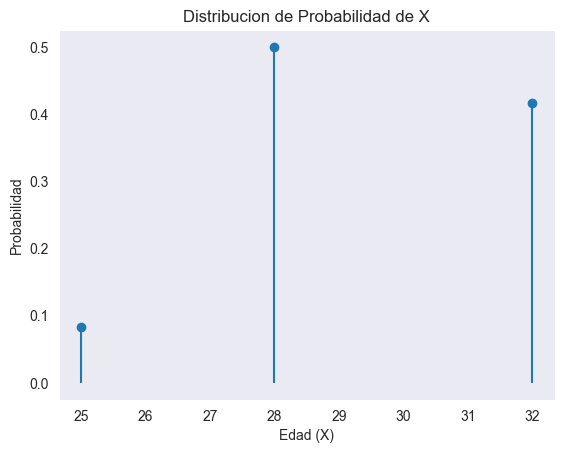

In [11]:
# Vector de probabilidades y valores
p = np.array([1/12, 6/12, 5/12])
x = np.array([25, 28, 32])

plt.stem(x, p, basefmt = " ")
plt.title("Distribucion de Probabilidad de X")
plt.xlabel("Edad (X)")
plt.ylabel("Probabilidad")
plt.show()

In [12]:
# Media Poblacional 
mu = np.sum(p * x)

# Varianza Poblacional
sigma2 = np.sum(p * (x - mu)**2)

# Desviacion estandar 
sigma = np.sqrt(sigma2)

# Muestra 
n_sample = 2 

np.random.choice(x, size = n_sample, replace = True, p = p)

array([32, 28])

Las observaciones $X_1, X_2, \cdots, X_n$ constituyen un conjunto de variables aleatorias independientes dado que el proceso de reemplazo, ninguna observación se ve afectada por la otra. 

Si las variables aleatorias (*v.a*)  $X_1, X_2, \cdots, X_n$ tienen la misma función de densidad que la distribución de la población y su función de distribución conjunta, es igual al producto de las marginales, entonces  $X_1, X_2, \cdots, X_n$ forman un conjunto de $n$ variables aleatorias que constituyen la muestra aleatoria de la población. 

### Parámetro y Estadístico

* **Parámetro** es una característica numérica del a distribución de la población de manera que describe, parcial o completamente, la función de densidad de la característica de interés.

* **Estadístico** Es cualquier función real de las variables aleatorias que integran la muestra. Es decir, es una función de las observaciones muestrales, la cual no contiene ningún valor o parámetro desconocido. En general, un estadístico se representa como: 

\begin{equation*}
T = g(X_1, X_2, \cdots, X_n)
\end{equation*}

En una **poblacion finita**, de tamano $N$, los parametros poblacionales media y varianza, vienen dados por:

\begin{equation*}
\mu = \frac{1}{N}\sum_{i=1}^{N}X_i \quad \sigma^2 = \frac{1}{N}\sum_{i=1}^{N}(X_i -\mu)^2
\end{equation*}

Para una **muestra** aleatoria simple de tamano $n$, los **estadisticos** media y varianza muestral se definen como: 

\begin{equation*}
\overline{X} = \frac{1}{n}\sum_{i=1}^{n}X_i \quad S^2 = \frac{1}{n-1}\sum_{i=1}^{n}(X_i -\overline{X})^2
\end{equation*}

**Ejemplo** Del ejercicio anterior sobre las edades de los alumnos, obtenga : 

* Parámetros poblacionales $\mu$, $\sigma^2$
* Para $n=2$, calcule  $\overline{X}$, luego repita el muestreo 5.000 veces y realice un histograma para $\overline{X}$.
* Realice el paso anterior para diferentes tamanos muestrales, es decir $n=10, 30, 100, 5000, 1000$.
* ¿ Qué puede concluir de lo anterior ? , ¿ por qué la distribución muestral se asemeja a una distribución normal siendo que no hemos hecho ningún supuesto previo ? 

In [13]:
# Media y varianza poblacional 
mu = np.sum(p * x)
sigma2 = np.sum(p * (x - mu)**2)
print(f"""La media poblacional es {mu} y varianza poblacional es {sigma2}""")

La media poblacional es 29.416666666666664 y varianza poblacional es 5.409722222222222


In [14]:
n_sample = 2 
sample = np.random.choice(x, size = n_sample, replace = True, p = p)
Xbar = np.sum(sample) / len(sample)
print(f""" El valor promedio es {Xbar}""")


 El valor promedio es 32.0


In [15]:
iter_sample = 5000
Xbar_sample = []

for i in range(0, iter_sample):
    sample = np.random.choice(x, size = n_sample, replace = True, p = p)
    xbar = np.sum(sample) / len(sample)
    Xbar_sample.append(xbar)

<Axes: ylabel='Count'>

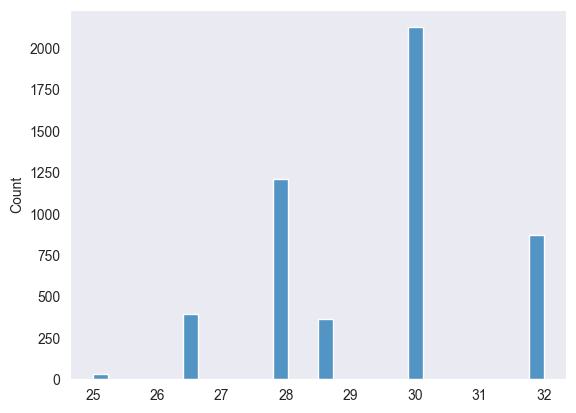

In [16]:
# Histograma 
sns.histplot(Xbar_sample)

In [17]:
results = {"n_sample": [], "mean_sample": []}

n_sample = [2, 10, 30, 100, 500, 1000]

for i in n_sample:
    for j in range(0, iter_sample):
        sample = np.random.choice(x, size = i, replace = True, p = p)
        xbar = np.sum(sample) / len(sample)
        results["n_sample"].append(i)
        results["mean_sample"].append(xbar)

# Convertir el diccionario en un DataFrame
df_results = pd.DataFrame(results)

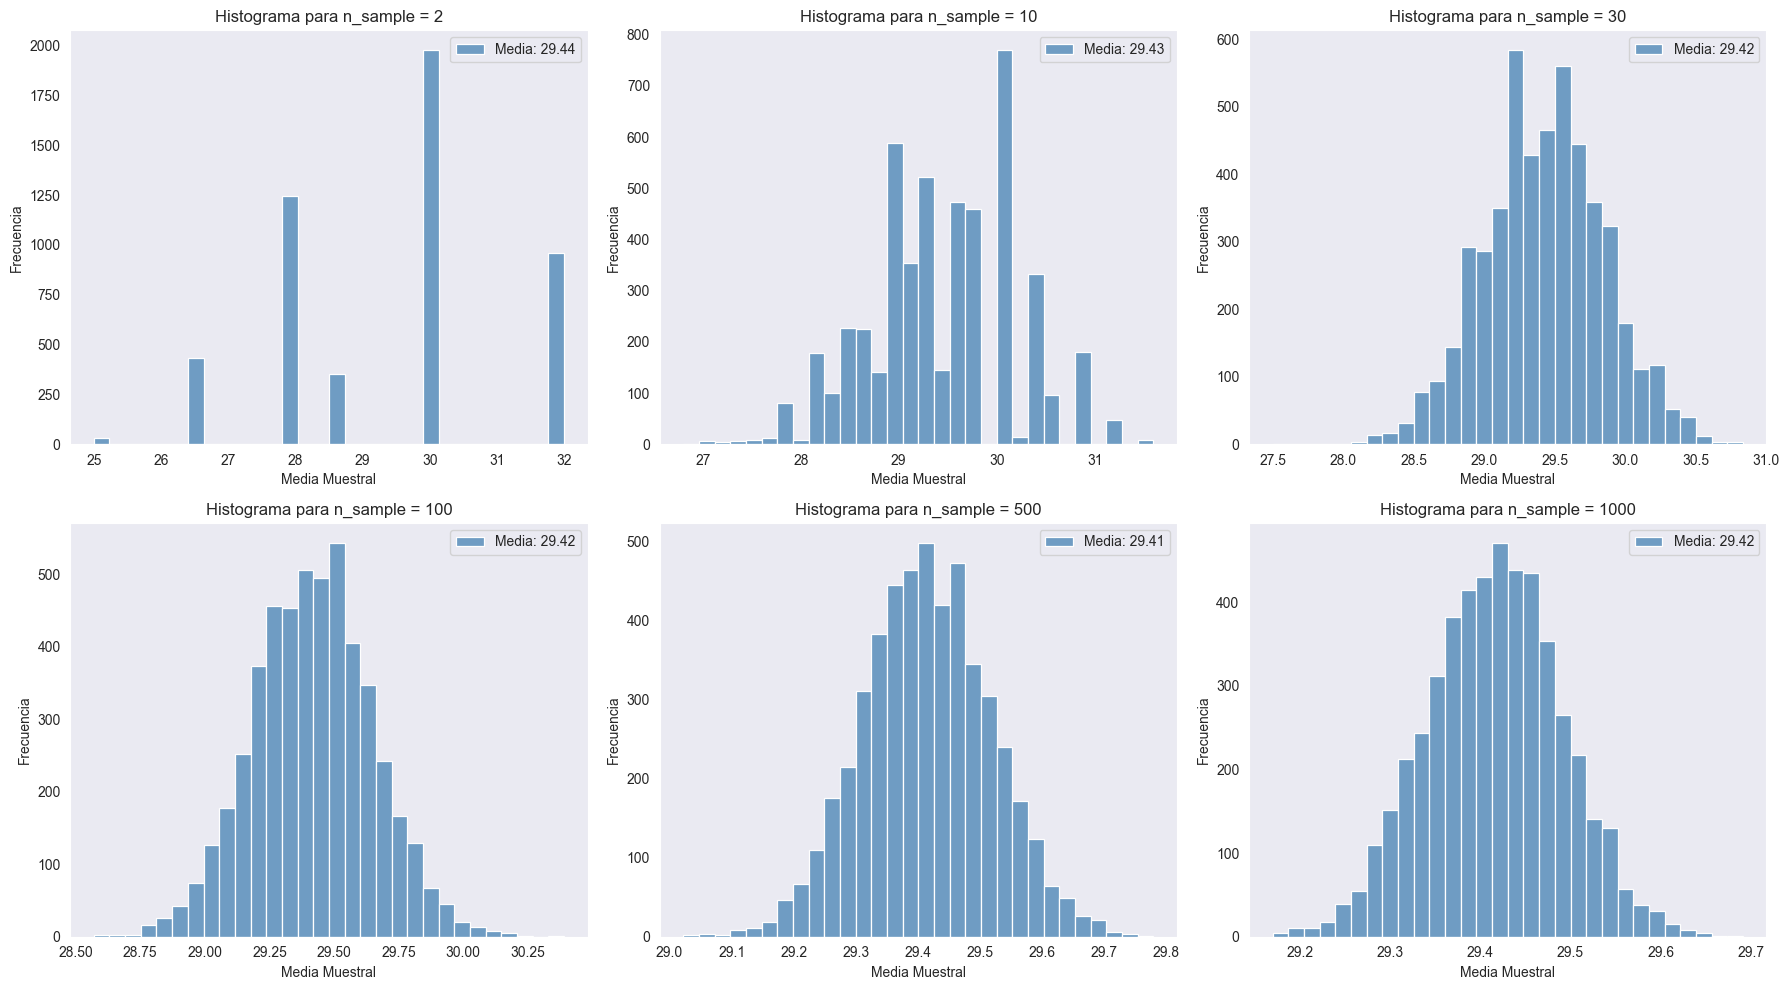

In [20]:
# Crear un subplot para cada tamaño muestral
fig, axes = plt.subplots(2, 3, figsize = (18, 10))  
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Lista de tamaños muestrales
n_sample = [2, 10, 30, 100, 500, 1000]

# Generar un histograma para cada tamaño muestral
for i, n in enumerate(n_sample):

    # Filtrar el DataFrame por el tamaño muestral actual
    data = df_results[df_results["n_sample"] == n]["mean_sample"]
    
    # Crear el histograma
    sns.histplot(data, bins = 30, kde=False, ax = axes[i], color = "steelblue")

    # Calcular la media muestral
    mean_value = data.mean()

    # Agregar título y etiquetas
    axes[i].set_title(f"Histograma para n_sample = {n}")
    axes[i].set_xlabel("Media Muestral")
    axes[i].set_ylabel("Frecuencia")

    # Agregar la media muestral como leyenda
    axes[i].legend([f"Media: {mean_value:.2f}"], loc="upper right")
# Ajustar el diseño del subplot
plt.tight_layout()
plt.show()

### Teorema del Limite Central

Sea $X_1, X_2, \cdots X_n$ un conjunto de variables aleatorias independientes e identicamente distribuidas con media $\mu$ y varianza $\sigma^2$ y $S_n = X_1 + X_2 + \cdots X_n$. Entonces 

\begin{equation*}
\lim_{n\to\infty}\textsf{Prob}\left(\frac{S_n - n\mu}{\sigma/\sqrt{n}}\right) = \Phi(z)
\end{equation*}

Donde $\Phi(z)$ es una función de distribución normal estándar $\mathcal{N}(0,1)$

<tr>
<center>
<td><img src="../figs/galton3.png" style="width: 500px;"/> </td>
</center>
</tr>

In [76]:
# Media muestral de los retornos de Google
precios  = yf.download('GOOGL', start = '2020-01-01', end = '2023-01-01', progress = False)['Close']
retornos = precios.pct_change().dropna()*100

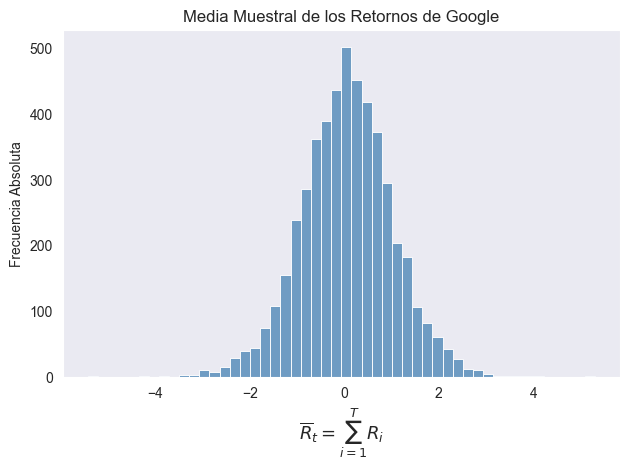

In [100]:
n_sample = 5
sims = 5000
retorno_muestral = []

for n in range(0, sims):
    # Muestras aleatorias de los retornos
    smp = retornos['GOOGL'].sample(n_sample, replace = True).mean()
    # Media Muestral de los retornos
    retorno_muestral.append(smp)

sns.histplot(retorno_muestral, bins = 50, kde = False, color = "steelblue")
plt.title("Media Muestral de los Retornos de Google")
plt.xlabel('$\overline{R}_t = \sum_{i=1}^{T}R_{i}$', fontsize = 13)
plt.ylabel('Frecuencia Absoluta')
plt.tight_layout()

### Estimadores y Propiedades

Un estimador es un *estadístico* utilizado para estimar un parámetro desconocido de la población. Para cada parámetro, pueden existir infinitos estimadores diferentes. En general, se elige el estimador que posea *mejores propiedades que los restantes*, ahora ¿ cuáles son estas propiedades ?

* Insesgamiento 
* Eficiencia
* Suficiencia
* Consistencia
* Robustez 
* Invarianza

#### Insesgamiento 

Cuando realizamos una estimación de un parámetro $\theta$ mediante un estimador estadístico $T$, a veces cometemos errores. Estos errores pueden ser por exceso o por defecto. El error, también es una variable aleatoria definida como $T-\theta$. La primera propiedad que vamos a requerir a un estimador, es que en términos medios, el error que se cometa al estimar un parámetro, sea cero. 

**Definición 1:** Sea $X$ una variable aleatoria y $f(x; \theta)$ su función de densidad. Diremos que $T$ es un estimador insesgado de $\theta$ si se verifica que $\mathbb{E}(T) = \theta$

**Definición 2:** La diferencia entre la esperanza del estimador y el parámetro, se llama sesgo del estimador y lo escribiremos como $b(\theta) = \mathbb{E}(T) - \theta$

<tr>
<center>
<td><img src="../figs/unbiased.webp" style="width: 500px;"/> </td>
</center>
</tr>

Si el sesgo es un estimador positivo, este tenderá a sobreestimar el valor verdadero del parámetro, sin embargo, si el sesgo es negativo, el estimador tenderá a infravalorar el valor a estimar. 

**Ejemplo:** Consideremos los tres estimadores de la media de una población normal $\mathcal{N}(2,\sigma^2)$:

\begin{equation*}
\begin{aligned}
\mathbb{E}(\mu_1) &= \frac{n\mu}{(n-1)} \\
\mathbb{E}(\mu_2) &= \mu \\
\mathbb{E}(\mu_3) &=  \frac{n\mu}{(n+1)}
\end{aligned}
\end{equation*}

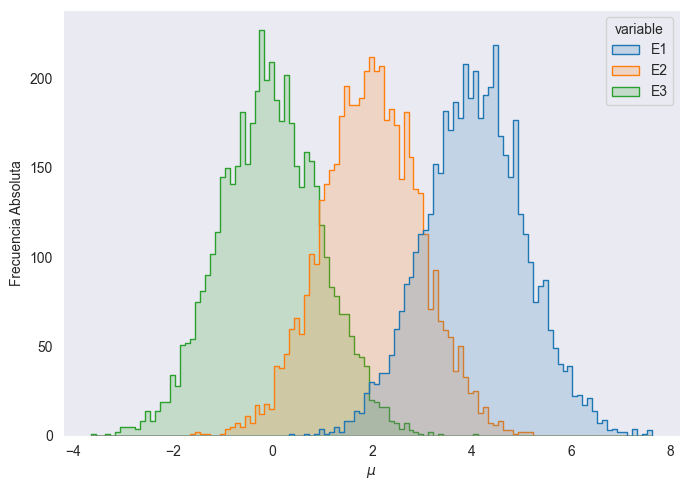

In [38]:
# Parámetros
n = 5000
mu = 2
mu1 = n * mu / (n - 100)
mu2 = mu
mu3 = n * mu / (n + 100)

# Simulación
E1 = np.random.normal(loc = mu1 + 2, size = n)
E2 = np.random.normal(loc = mu2, size = n)
E3 = np.random.normal(loc = mu3 - 2, size = n)

# Crear DataFrame
df = pd.DataFrame({'E1': E1, 'E2': E2, 'E3': E3})

df_long = df.melt(var_name='variable', value_name='value')

plt.figure(figsize = (7, 5))
sns.histplot(data = df_long, x = 'value', hue = 'variable', binwidth = 0.1, 
             element = "step", stat = "count", fill = True, alpha = 0.2, 
             common_norm = False)
plt.xlabel('$\mu$')
plt.ylabel('Frecuencia Absoluta')
plt.tight_layout()

El primer estimador, tiene sesgo positivo y tenderá a sobreestimar la media de la población, mientras que el tercero, tiene sesgo negativo y tenderá a asignar a la media valores inferiores a su valor real. Frente a este escenario, el estimador $\mu$ es un estimador insesgado.

**Definición 3:** Se llama error cuadrático medio al estimador : 

\begin{equation*}
\textsf{ECM}(T) = \mathbb{E}(T-\theta)^2
\end{equation*}

De la expresión anterior, deduciremos propiedades importantes que debe cumplir un estimador para ser considerado aceptable. 

\begin{equation*}
\textsf{ECM}(T) = \textsf{Var}(T) + \mathbb{E}(T-\mathbb{\theta})^2
\end{equation*}

* **Contribucion 1.** El tamaño del error viene dado por la varianza del estimador, es decir, su precisión. Si el estimador tiene poca capacidad de variación para las distintas muestras que podamos tomar, esto contribuirá de forma positiva al obtención de un error mas pequeño.

* **Contribucion 2.** El tamaño del error vendrá determinado por la diferencia entre el valor medio que tome el estimador y el parámetro desconocido. Así, por ejemplo, si para distintos valores muestrales la medida del estimador coincide con $\theta$ habremos obtenido un buen estimador. 
  
**Ejemplo:** Sea $X\sim\mathcal{N}(\mu, 30)$. Obtenga la esperanza y varianza de los siguiente estimadores propuestos y obtenga el $\textsf{ECM}$. ¿Qué puede concluir con sus resultados?.

\begin{equation*}
\begin{aligned}
\mu_1 &= \frac{1}{n-1}\sum_{i=1}^{n}x_i \\
\mu_2 &= \frac{1}{n}\sum_{i=1}^{n}x_i \\
\mu_3 &= \frac{1}{n+1}\sum_{i=1}^{n}x_i
\end{aligned}
\end{equation*}

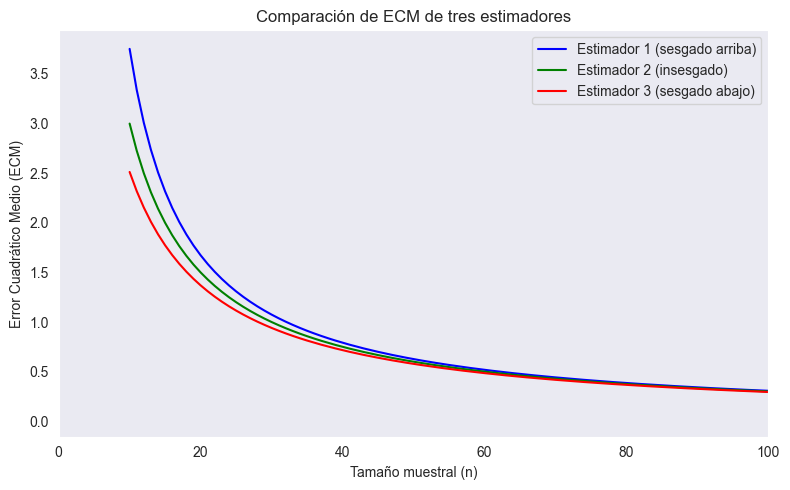

In [46]:
# Parametros iniciales 
mu = 2 
sig2 = 30
n_vals = np.arange(10, 1001)

# Listas vacias para contener emc 
emc1 = []
emc2 = []
emc3 = []

for n in n_vals : 
    # Estimadores de la media 
    mu1 = (n * mu) / (n - 1)
    mu2 = mu
    mu3 = (n * mu) / (n + 1)

    # Estimadores de la varianza
    sigma1 = sig2 * n / (n - 1)**2
    sigma2 = sig2 / n
    sigma3 = sig2 * n / (n + 1)**2

    emc1.append(sigma1 + (mu - mu1)**2)
    emc2.append(sigma2 + (mu - mu2)**2)
    emc3.append(sigma3 + (mu - mu3)**2)

df_ecm = pd.DataFrame({
    'n': n_vals,
    'ecm1': emc1,
    'ecm2': emc2,
    'ecm3': emc3})

plt.figure(figsize=(8, 5))
plt.plot(df_ecm['n'], df_ecm['ecm1'], label='Estimador 1 (sesgado arriba)', color='blue')
plt.plot(df_ecm['n'], df_ecm['ecm2'], label='Estimador 2 (insesgado)', color='green')
plt.plot(df_ecm['n'], df_ecm['ecm3'], label='Estimador 3 (sesgado abajo)', color='red')

plt.xlabel('Tamaño muestral (n)')
plt.ylabel('Error Cuadrático Medio (ECM)')
plt.title('Comparación de ECM de tres estimadores')
plt.legend()
plt.xlim(0,100)
plt.tight_layout()
plt.show()


#### Eficiencia

Una vez obtenidos dos estimadores insesgados de un parametro, para determinar cual de los dos es mas adecuado debemos prestar atencion a su varianza. Entre los dos elegiremos a aquel que presente menor variacion entorno al valor medio, ya que sera un estimador mas preciso.

* **Definicion 4:** Sea $X$ una variable aleatoria y sea $f(x;\theta)$. Sean $T_1$ y $T_2$ dos estimadores insesgados de $\theta$. Se dice que $T_1$ es mas eficiente que $T_2$ si:
  
\begin{equation*}
\textsf{Var}(T_1) < \textsf{Var}(T_2) 
\end{equation*}

* **Definicion 5:** Sea $X$ una variable aleatoria y sea $f(x;\theta)$ su función de densidad. Si $T$ es un estimador insesgado de $\theta$ y no hay ningun otro estimador que tenga minima varianza, entonces se dice que $T$ es el estimador insesgado de minima varianza de $\theta$. 

Estas dos propiedades, las podemos relacionar con ECM de un estimador.

\begin{equation*}
\textsf{ECM}(T) = \textsf{Var}(T) + \mathbb{E}(T-\mathbb{\theta})^2
\end{equation*}

De tal forma que entre todos los estimadores insesgados, aquel que presente una varianza minima sera el que presente un error cuadratico minimo. ¿ Podremos encontrar un estimador sesgado con menor $\textsf{ECM}$ ?. El problema de obtener estimadores con varianza minima, esta solucionado por el siguiente resultado.

* **Definicion 6:** Sea $X$ una variable aleatoria y sea $f(x;\theta)$ su función de densidad. Tomemos una muestra aleatoria simple de tamaño $n$ y sea $T$ un estimador de $\theta$. Entonces : 
  
\begin{equation*}
\textsf{Var}(T) \geq \frac{(1+b'(\theta))^2}{n\mathbb{E}\left(\frac{\partial\ln f(x;\theta)}{\partial\theta}\right)^2}
\end{equation*}

Donde $+b'(\theta)$ es la primera derivada del sesgo del estimador. La cota de Cramer-Rao permite determinar el valor mínimo que puede alcanzar la varianza de un estimador de un parámetro desconocido. 

#### Consistencia

Las dos propiedades anteriores, tienen vigencia independiente cual sea el tamaño muestral. El factor *tamaño muestral* debe también ayudarnos a determinar la calidad del estimador. Parece lógico exigir a un buen estimador que al aumentar el tamaño muestral, su precisión aumente.

* **Definición 7:** Sea $X$ una variable aleatoria y sea $f(x;\theta)$ su función de densidad. Sea $T_n$ es un estimador de $\theta$ para una muesta de tamaño $n$. Diremos que $T_n$ es un estimador consistente si la sucesión de estimadores $\{T_n\}$ converge en probabilidad a $\theta$, es decir: 

\begin{equation*}
\lim_{n\to\infty}\textsf{Prob}(|T_n - \theta|\geq \epsilon) = 0 \quad\forall\epsilon>0
\end{equation*}

Una característica de los estimadores consistentes que resulta más simple de aplicar en la práctica, es la siguiente.

* **Proposición:**  Sea $X$ una variable aleatoria y sea $f(x;\theta)$ su función de densidad. Además, sea $T_n$ un estimador de $\theta$ para una muestra de tamaño $n$. Si se verifica que: 

\begin{equation*}
\lim_{n\to\infty}\mathbb{E}(T_n) = \theta\quad \lim_{n\to\infty}\textsf{Var}(T_n)=0
\end{equation*}

De esta manera, un estimador consistente será aquel que, a medida que la muestra aumenta, el valor esperado del estimador tiende hacia al verdadero valor del parámetro (se vuelve insesgado) y la varianza del estimador se hace despreciable (la varianza tiende a 0). 

\begin{equation*}
\textsf{ECM}(T) = \underbrace{\textsf{Var}(T)}_{\lim_{n\to\infty}\textsf{Var}(T_n)=0} + \underbrace{\mathbb{E}(T-\mathbb{\theta})^2}_{\lim_{n\to\infty}\mathbb{E}(T_n) = \theta}
\end{equation*}

#### Métodos de Estimación

Todo el proceso de estimación parte de los correspondientes estimadores muestrales.
Un estimador es una función de los valores de la muestra que se elabora para indagar el valor de un parámetro de la población de la cual procede la muestra.

Cuando se obtiene una estimación puntual de un parámetro, es conveniente acompañar dicha estimación por una *medida* de la precisión de la estimación. Un modo de hacerlo es informar el estimador y su error estandard. Otro modo es reemplazar la estimación puntual por un intervalo de valores posibles para el parámetro.
Así, las estimaciones pueden ser de dos tipos:

* **`Estimación Puntual`** Se obtiene un punto, un valor como estimación del parámetro desconocido, quedando sin especificar que tan buena es la estimación.
  
* **`Estimación por Intervalos`** Proporciona un rango de posibles valores, dentro cual estimamos que estará el parámetro desconocido.

Un *estimador puntual* es un *estadístico muestral* (media aritmética, varianza, etc) que se emplea para estimar parámetros (media poblacional, varianza poblacional, etc). Una forma natural de estimar muchos parámetros poblacionales consiste en utilizar el estadístico muestral correspondiente. Así, la media muestral, es un estimador puntual de la media poblacional.

* **Definición 8:** Un estimador puntual de un parámetro $\theta$ es un valor que puede ser considerado representativo de $\theta$ y se indicará como $\hat{\theta}$. Se obtuene a partir de la función de la muestra. 

##### Máxima Verosimilitud

Sea una muestra aleatoria $\{X_1, X_2, \cdots, X_n\}$ procedente de una poblacion con funcion de probabilidad $P(x;\theta)$ o con funcion de densidad $f(x;\theta)$ donde $\theta$ es un parametro desconocido que toma valores en el espacio parametrico $\Omega$, $\theta\in\Omega$. La funcion de densidad conjunta de una muestra aleatoria la indicaremos por: 

\begin{equation*}
f(x_1, x_2, \cdots, x_n) = \prod_{i=1}^{n}f(x_i ; \theta)
\end{equation*}

* **Definición 9:** La funcion de verosimilitud de $n$ variables aleatorias, se define como: 

\begin{equation*}
L(x;\theta) = L(x_1, x_2, \cdots, x_n; \theta) = \prod_{i=1}^{n}f(x_i ; \theta)
\end{equation*}

* **Definición 10:** El método de máxima verosimilitud consiste en elegir como estimador del parámetro desconocido $\theta$ aque valor que $\hat{\theta}(x_1, x_2, \cdots, x_n)$ hace maxima la funcion de verosimilitud $L(x_1, x_2, \cdots, x_n; \theta)$. Es decir, consiste en encontrar aquel valor de $\hat{\theta}(x_1, x_2, \cdots, x_n)$ tal que: 
  
\begin{equation*}
 \hat{\theta}(x_1, x_2, \cdots, x_n) = \argmax_{\theta\in\Omega} L(x_1, x_2, \cdots, x_n; \theta)
\end{equation*}

<table>
  <tr>
    <td><img src="../figs/normalbi.png" style="width: 400px;"/></td>
    <td><img src="../figs/animation.gif" style="width: 400px;"/></td>
  </tr>
</table>

**Ejemplo:** Sea $X_n$ una sucesión de variables aleatorias con función de probabilidad $P(x_i; \theta)$ tal que

\begin{equation*}
P(X=x) = \theta^{x_i}(1-\theta)^{1-x_i}
\end{equation*}

Encuentre el estimador máxima verosimilitud $\hat{\theta}$ para el parámetro $\theta$.

Valor verdadero de p: 0.7
Estimador de máxima verosimilitud (MLE): 0.6600


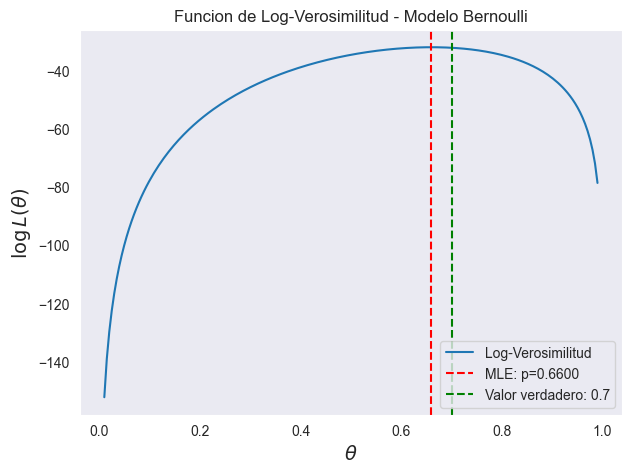

In [109]:
from scipy.optimize import minimize

n = 50
theta_true = 0.7
x = np.random.binomial(1, theta_true, n)

def neg_log_likelihood(theta): 
    if theta <= 0 or theta>=1:
        return np.inf 
    return -np.sum(x * np.log(theta) + (1-x)*np.log(1 - theta))

result = minimize(neg_log_likelihood, x0 = 0.5, bounds=[(1e-5, 1 - 1e-5)])
theta_mle = result.x[0]

print(f"Valor verdadero de p: {theta_true}")
print(f"Estimador de máxima verosimilitud (MLE): {theta_mle:.4f}")

theta_grid = np.linspace(0.01, 0.99, 200)
log_likelihood = [ -neg_log_likelihood(theta) for theta in theta_grid ]

plt.figure(figsize = (7, 5))
plt.plot(theta_grid, log_likelihood, label='Log-Verosimilitud')
plt.axvline(theta_mle, color = 'red', linestyle = '--', label = f'MLE: p={theta_mle:.4f}')
plt.axvline(theta_true, color = 'green', linestyle = '--', label = f'Valor verdadero: {theta_true}')
plt.xlabel(r'$\theta$', fontsize = 14)
plt.ylabel(r'$\log L(\theta)$', fontsize = 14)
plt.title('Funcion de Log-Verosimilitud - Modelo Bernoulli')
plt.legend()
plt.show()

**Ejemplo:** Sea $X_n$ una sucesión de variables aleatorias con función de probabilidad $P(x_i ; \lambda)$ tal que: 

\begin{equation*}
 P(X=x) = e^{-\lambda}\frac{\lambda^x_i}{x!}
\end{equation*}

Encuentre el estimador de máxima verosimilitud $\hat{\lambda}$ para el parámetro $\lambda$. 


In [110]:
from scipy.special import gammaln 

lambda_true = 4.5
x = np.random.poisson(lam = lambda_true, size = n)

def neg_log_likelihood(lmbda):
    if lmbda <= 0:
        return np.inf
    return -(-n * lmbda + np.sum(x) * np.log(lmbda) - np.sum(gammaln(x + 1)))

result = minimize(neg_log_likelihood, x0=1.0, bounds=[(1e-5, None)])
lambda_mle = result.x[0]

print(f"Valor verdadero de lambda: {lambda_true}")
print(f"Estimador MLE: {lambda_mle:.4f}")


Valor verdadero de lambda: 4.5
Estimador MLE: 4.2800


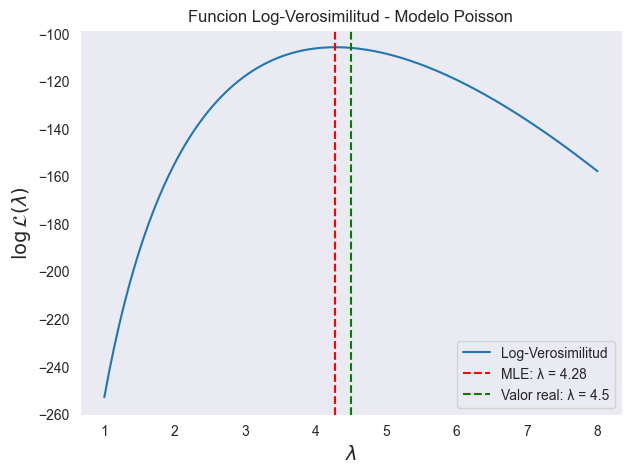

In [112]:
lambda_grid = np.linspace(1, 8, 200)
log_likelihood = [-neg_log_likelihood(lmbda) for lmbda in lambda_grid]

plt.figure(figsize = (7, 5))
plt.plot(lambda_grid, log_likelihood, label = 'Log-Verosimilitud')
plt.axvline(lambda_mle, color = 'red', linestyle = '--', label = f'MLE: λ = {lambda_mle:.2f}')
plt.axvline(lambda_true, color = 'green', linestyle = '--', label = f'Valor real: λ = {lambda_true}')
plt.xlabel(r'$\lambda$', fontsize = 14)
plt.ylabel(r'$\log \mathcal{L}(\lambda)$', fontsize = 14)
plt.title('Funcion Log-Verosimilitud - Modelo Poisson')
plt.legend()
plt.show()